<a href="https://colab.research.google.com/github/SaizMarcelo/Proyecto_3_Big_Data_y_Machine_Learning/blob/main/TpBigData_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTAMOS BIBLIOTECAS PARA TRABAJAR.
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [2]:

# Cargamos los datos desde el archivo CSV
data_set_ruta = 'https://github.com/SaizMarcelo/Proyecto_3_Big_Data_y_Machine_Learning/blob/main/Crimenes.csv?raw=true'



In [3]:
# CONSULTAMOS LA INFORMACION DE LA ESTRUCTURA DEL DATASET.
df_crimenes =pd.read_csv(data_set_ruta)
print(df_crimenes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [4]:
print(df_crimenes)

            Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
0          Alabama        13.2      236                58         21.2
1           Alaska        10.0      263                48         44.5
2          Arizona         8.1      294                80         31.0
3         Arkansas         8.8      190                50         19.5
4       California         9.0      276                91         40.6
5         Colorado         7.9      204                78         38.7
6      Connecticut         3.3      110                77         11.1
7         Delaware         5.9      238                72         15.8
8          Florida        15.4      335                80         31.9
9          Georgia        17.4      211                60         25.8
10          Hawaii         5.3       46                83         20.2
11           Idaho         2.6      120                54         14.2
12        Illinois        10.4      249                83         24.0
13    

In [5]:
# ANALIZAMOS LAS ESTADISTICAS DEL DATASET.
estadisticas = df_crimenes.describe()
print(estadisticas)

       Asesinatos     Asaltos  Poblacion Urbana  Violaciones
count    50.00000   50.000000         50.000000    50.000000
mean      7.78800  170.760000         65.540000    21.232000
std       4.35551   83.337661         14.474763     9.366385
min       0.80000   45.000000         32.000000     7.300000
25%       4.07500  109.000000         54.500000    15.075000
50%       7.25000  159.000000         66.000000    20.100000
75%      11.25000  249.000000         77.750000    26.175000
max      17.40000  337.000000         91.000000    46.000000


#OBJETIVO: clasificar los estados en diferentes categorías, dividiéndolos en zonas de baja peligrosidad y alta peligrosidad

In [6]:
# DataSet sin normalizar:
df_crimenes_sinNormalizar = pd.read_csv(data_set_ruta)


In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas a normalizar
cols_to_normalize = ['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas seleccionadas
df_crimenes[cols_to_normalize] = scaler.fit_transform(df_crimenes[cols_to_normalize])

# Imprimir el dataset normalizado
print(df_crimenes)

            Estado  Asesinatos   Asaltos  Poblacion Urbana  Violaciones
0          Alabama    0.746988  0.654110          0.440678     0.359173
1           Alaska    0.554217  0.746575          0.271186     0.961240
2          Arizona    0.439759  0.852740          0.813559     0.612403
3         Arkansas    0.481928  0.496575          0.305085     0.315245
4       California    0.493976  0.791096          1.000000     0.860465
5         Colorado    0.427711  0.544521          0.779661     0.811370
6      Connecticut    0.150602  0.222603          0.762712     0.098191
7         Delaware    0.307229  0.660959          0.677966     0.219638
8          Florida    0.879518  0.993151          0.813559     0.635659
9          Georgia    1.000000  0.568493          0.474576     0.478036
10          Hawaii    0.271084  0.003425          0.864407     0.333333
11           Idaho    0.108434  0.256849          0.372881     0.178295
12        Illinois    0.578313  0.698630          0.864407     0

In [8]:
# ANALIZAMOS LAS ESTADISTICAS DEL DATASET.
estadisticas = df_crimenes.describe()
print(estadisticas)

       Asesinatos    Asaltos  Poblacion Urbana  Violaciones
count   50.000000  50.000000         50.000000    50.000000
mean     0.420964   0.430685          0.568475     0.360000
std      0.262380   0.285403          0.245335     0.242025
min      0.000000   0.000000          0.000000     0.000000
25%      0.197289   0.219178          0.381356     0.200904
50%      0.388554   0.390411          0.576271     0.330749
75%      0.629518   0.698630          0.775424     0.487726
max      1.000000   1.000000          1.000000     1.000000


In [9]:
# OBTENEMOS LAS COLUMNAS DEL DATASET NORMALIZADO QUE NOS INTERESA PARA EL ANALISIS.
columna_asesinatos = df_crimenes.loc[:,"Asesinatos"]
columna_asaltos = df_crimenes.loc[:,"Asaltos"]
columna_poblacion = df_crimenes.loc[:,"Poblacion Urbana"]
columna_violaciones = df_crimenes.loc[:,"Violaciones"]


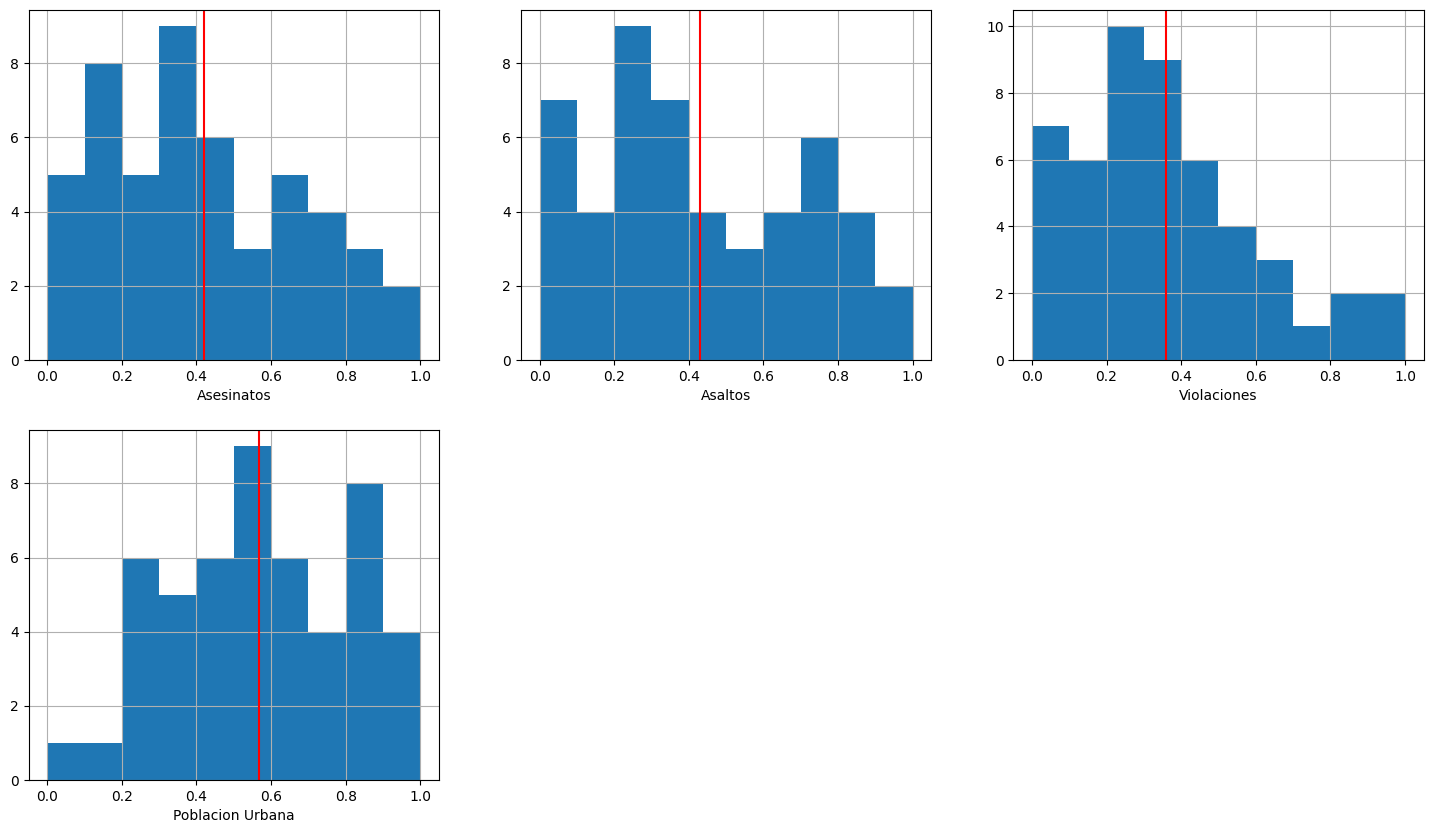

In [10]:
# GRAFICAMOS HISTOGRAMAS Y LA MEDIA DE LOS DATOS.
plt.figure(figsize=(18,10))
plt.subplot(231)
plt.hist(columna_asesinatos)
plt.axvline(x=0.420964, ymin=0, ymax=1, c = "red")
plt.xlabel("Asesinatos")
plt.grid()
plt.subplot(232)
plt.hist(columna_asaltos)
plt.axvline(x=0.430685, ymin=0, ymax=1, c = "red")
plt.xlabel("Asaltos")
plt.grid()
plt.subplot(233)
plt.axvline(x=0.360000, ymin=0, ymax=1, c = "red")
plt.hist(columna_violaciones)
plt.xlabel("Violaciones")
plt.grid()
plt.subplot(234)
plt.axvline(x=0.568475, ymin=0, ymax=1, c = "red")
plt.hist(columna_poblacion)
plt.xlabel("Poblacion Urbana")
plt.grid()
plt.show()

In [11]:
# OBTENEMOS LAS COLUMNAS DEL DATASET NORMALIZADO QUE NOS INTERESA PARA EL ANALISIS.
columna_asesinatos_sn = df_crimenes_sinNormalizar.loc[:,"Asesinatos"]
columna_asaltos_sn = df_crimenes_sinNormalizar.loc[:,"Asaltos"]
columna_poblacion_sn = df_crimenes_sinNormalizar.loc[:,"Poblacion Urbana"]
columna_violaciones_sn = df_crimenes_sinNormalizar.loc[:,"Violaciones"]


In [12]:
estadisticas = df_crimenes_sinNormalizar.describe()
print(estadisticas)

       Asesinatos     Asaltos  Poblacion Urbana  Violaciones
count    50.00000   50.000000         50.000000    50.000000
mean      7.78800  170.760000         65.540000    21.232000
std       4.35551   83.337661         14.474763     9.366385
min       0.80000   45.000000         32.000000     7.300000
25%       4.07500  109.000000         54.500000    15.075000
50%       7.25000  159.000000         66.000000    20.100000
75%      11.25000  249.000000         77.750000    26.175000
max      17.40000  337.000000         91.000000    46.000000


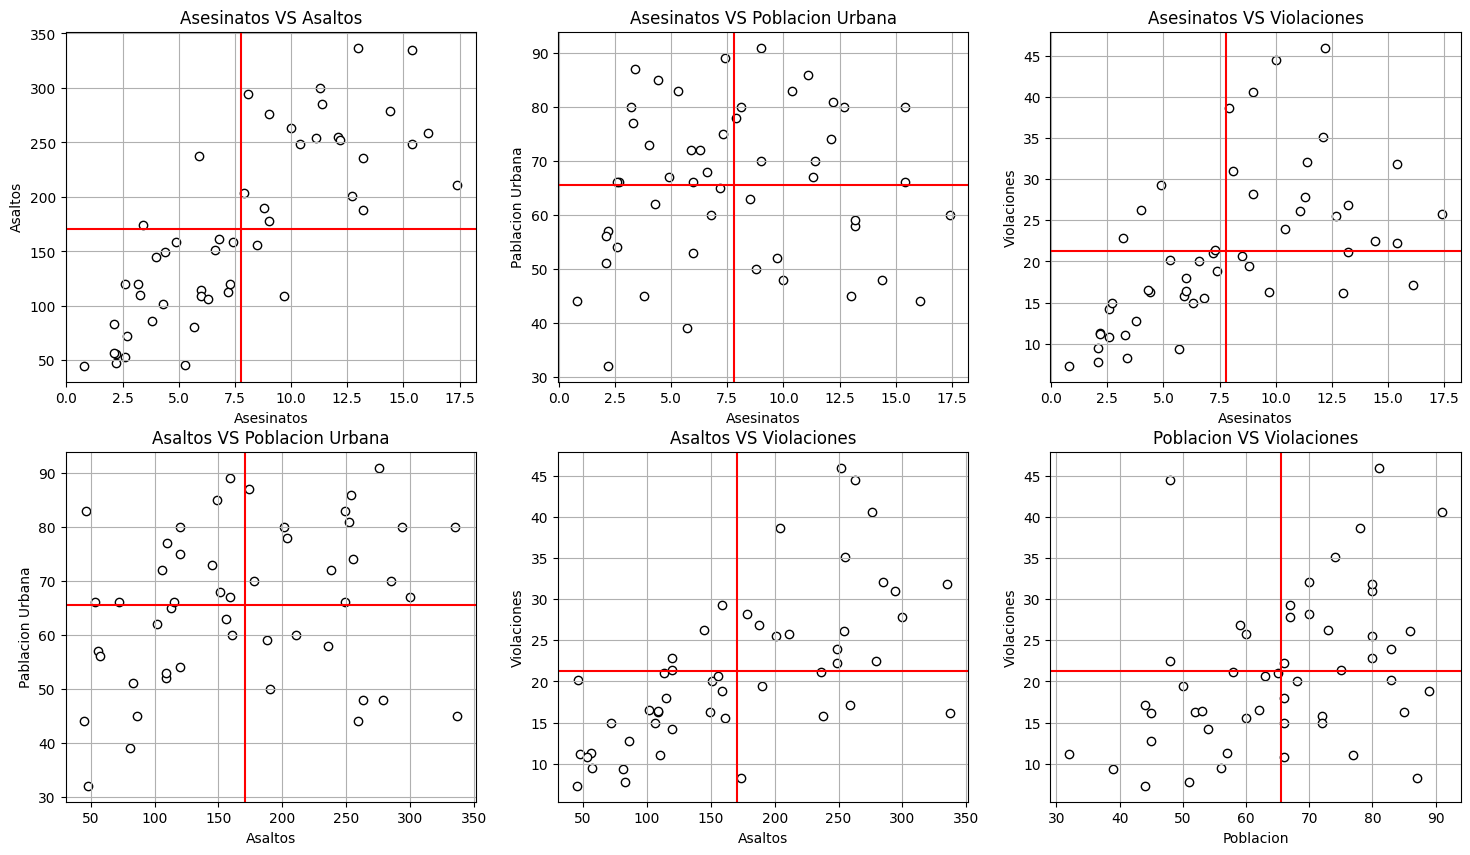

In [13]:
# GRAFICAMOS LOS PUNTOS DEL DATA SET Y LA MEDIA DE LOS DATOS.
plt.figure(figsize=(18,10))
plt.subplot(231)
plt.scatter(columna_asesinatos_sn, columna_asaltos_sn, c = "white", marker = "o", edgecolor="black")
plt.axvline(x=7.78800, ymin=0, ymax=1, c = "red")
plt.axhline(y=170.760000, xmin=0, xmax=1, c = "red")
plt.title("Asesinatos VS Asaltos")
plt.xlabel("Asesinatos")
plt.ylabel("Asaltos")
plt.grid()
plt.subplot(232)
plt.scatter(columna_asesinatos_sn, columna_poblacion_sn, c = "white", marker = "o", edgecolor="black")
plt.axvline(x=7.78800, ymin=0, ymax=1, c = "red")
plt.axhline(y=65.540000, xmin=0, xmax=1, c = "red")
plt.title("Asesinatos VS Poblacion Urbana")
plt.xlabel("Asesinatos")
plt.ylabel("Pablacion Urbana")
plt.grid()
plt.subplot(233)
plt.scatter(columna_asesinatos_sn, columna_violaciones_sn, c = "white", marker = "o", edgecolor="black")
plt.axvline(x=7.78800, ymin=0, ymax=1, c = "red")
plt.axhline(y=21.232000, xmin=0, xmax=1, c = "red")
plt.title("Asesinatos VS Violaciones")
plt.xlabel("Asesinatos")
plt.ylabel("Violaciones")
plt.grid()
plt.subplot(234)
plt.scatter(columna_asaltos_sn, columna_poblacion_sn, c = "white", marker = "o", edgecolor="black")
plt.axvline(x=170.760000, ymin=0, ymax=1, c = "red")
plt.axhline(y=65.540000, xmin=0, xmax=1, c = "red")
plt.title("Asaltos VS Poblacion Urbana")
plt.xlabel("Asaltos")
plt.ylabel("Pablacion Urbana")
plt.grid()
plt.subplot(235)
plt.scatter(columna_asaltos_sn, columna_violaciones_sn, c = "white", marker = "o", edgecolor="black")
plt.axvline(x=170.760000, ymin=0, ymax=1, c = "red")
plt.axhline(y=21.232000, xmin=0, xmax=1, c = "red")
plt.title("Asaltos VS Violaciones")
plt.xlabel("Asaltos")
plt.ylabel("Violaciones")
plt.grid()
plt.subplot(236)
plt.scatter(columna_poblacion_sn, columna_violaciones_sn, c = "white", marker = "o", edgecolor="black")
plt.axvline(x=65.540000, ymin=0, ymax=1, c = "red")
plt.axhline(y=21.232000, xmin=0, xmax=1, c = "red")
plt.title("Poblacion VS Violaciones")
plt.xlabel("Poblacion")
plt.ylabel("Violaciones")
plt.grid()

plt.show()

#OBSERVACION: de los datos estadisticos y las observacione se puede definir que para concluir sobre que zona tiene mayor o menor peligrosidad se debera clasificar en funcion de 3 parametros que se observan relacionados: Asaltos, Asesinatos y Violaciones.

In [14]:
df_crimenes_kmean = np.array(df_crimenes_sinNormalizar[["Asesinatos","Asaltos","Violaciones"]])


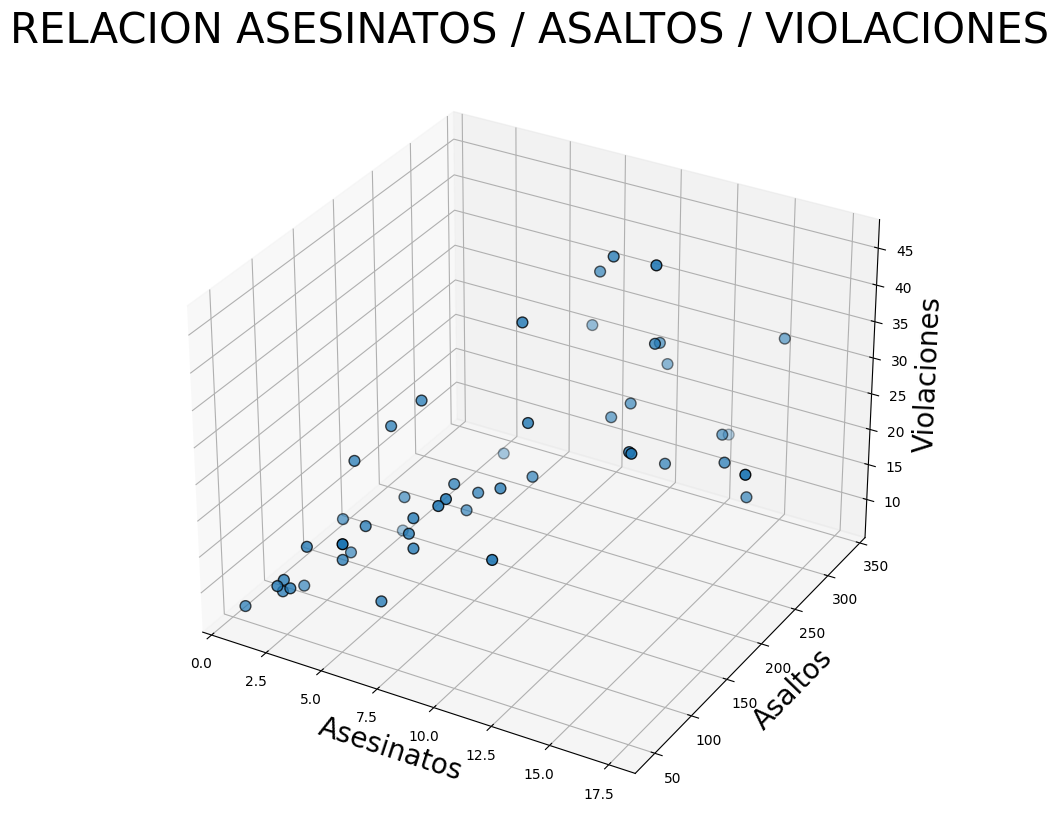

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 10))  # Corregir el tamaño de la figura
ax = fig.add_subplot(111, projection='3d')  # Crear un subplot 3D

# Datos de ejemplo
X = np.array(df_crimenes_sinNormalizar[["Asesinatos"]])
Y = np.array(df_crimenes_sinNormalizar[["Asaltos"]])
Z = np.array(df_crimenes_sinNormalizar[["Violaciones"]])

# Crear el gráfico de dispersión tridimensional
ax.scatter(X, Y, Z, edgecolor="black", s=60)

# Etiquetas de los ejes y título
ax.set_xlabel("Asesinatos", fontsize=20, rotation=0)
ax.set_ylabel("Asaltos", fontsize=20, rotation=0)
ax.set_zlabel("Violaciones", fontsize=20, rotation=0)
ax.set_title("RELACION ASESINATOS / ASALTOS / VIOLACIONES", fontsize=30)

plt.show()  # Mostrar el gráfico


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

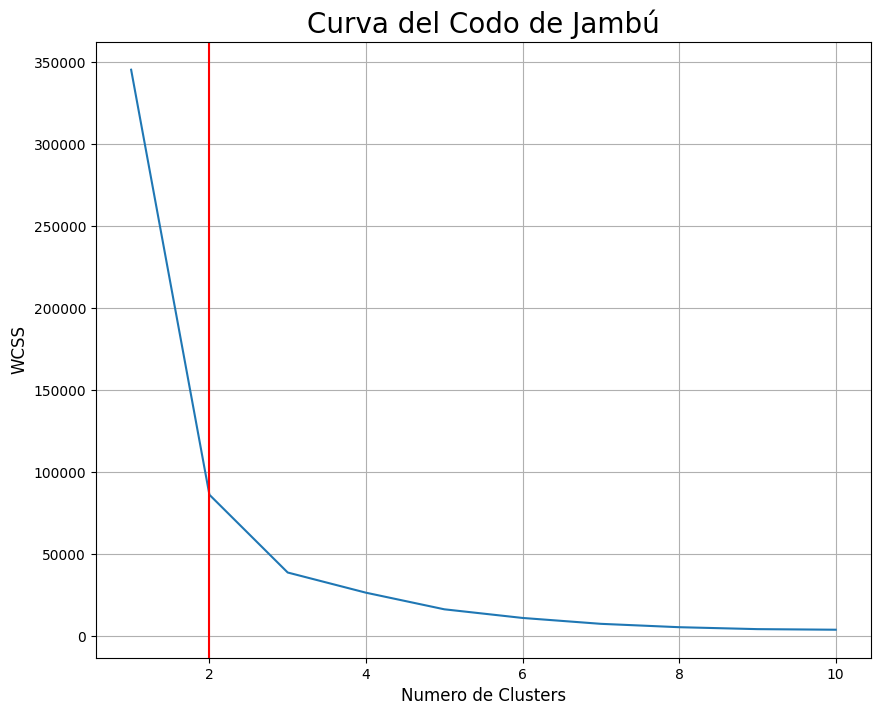

In [16]:
# METODO DEL CODO - CANTIDAD DE CLOSTERS OPTIMO.
# Creamos una lista vacia para ir almacenando los valores calculados (la suma de los cuadrados en cada numero de clusters.).
wcss = []
for i in range (1,11): # donde i = son los closters.
  km = KMeans(n_clusters=i, init="random", random_state=0, max_iter = 300) # creamos el clasificador con closters variable = i con un maximo de interac
  y_km = km.fit_predict(df_crimenes_kmean) # le pasamos el DataSet de 3 Dimensiones que vamos usar.
  wcss.append(km.inertia_) # Agregamos el dato wcss a la lista.
# Graficamos el Codo.
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss)
plt.axvline(x=2, ymin=0, ymax=300000, c = "red")
plt.title ("Curva del Codo de Jambú", fontsize=20)
plt.xlabel ("Numero de Clusters", fontsize=12 )
plt.ylabel ("WCSS", fontsize=12) # Suma de los cuadrados de cada uno de los closters.
plt.grid()
plt.show()

#**OBSERVACIÓN: Según la curva de codo, definimos un K=2 ya que normalmente el K debe definirse en el punto de la curva donde deja de decrecer drasticamente.**
#Tambien se podria crear un 3 clasificado ya que la curva da indicios de que un K=3 tambien podria ser un optimo, en este caso vamos a utilzar k=2 para diferenciar dos zonas de ALTO y BAJO riesgo.

In [17]:
# EJECUTAMOS ALGORITMO K-MEANS.
# Entrenamos utilizando el Clasificador No Supervisado K-MENAS
# Creamos el clasificador.
km = KMeans(n_clusters=2, init="random", random_state=0)
# Obtenemos la claisificacion de cada muestra del DataSet.
y_km = km.fit_predict(df_crimenes_kmean)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


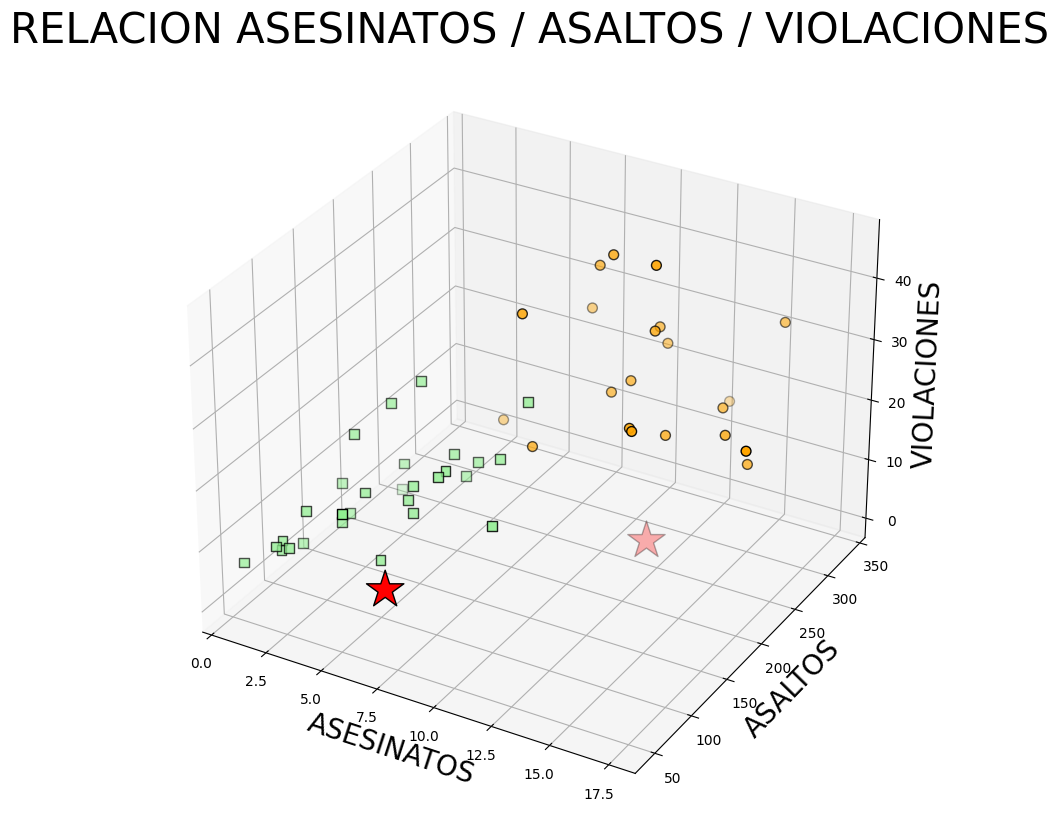

In [18]:
# GRAFICAMOS LOS GRUPOS .
# Transformamos el DataFrame: <class 'pandas.core.frame.DataFrame'> a <class 'numpy.ndarray'>
X = np.array(df_crimenes_sinNormalizar[["Asesinatos","Asaltos","Violaciones"]])

# Graficamos en 3D los parametros.
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("ASESINATOS", fontsize=20, rotation=0)
ax.set_ylabel("ASALTOS", fontsize=20, rotation=0)
ax.set_zlabel("VIOLACIONES", fontsize=20, rotation=0)
ax.set_title("RELACION ASESINATOS / ASALTOS / VIOLACIONES" , fontsize=30)
ax.scatter(X[y_km==0,0],X[y_km==0,1],X[y_km==0,2], s=50, c = "lightgreen", marker= "s",edgecolor="black", label = "Grupo 1")
ax.scatter(X[y_km==1,0],X[y_km==1,1],X[y_km==1,2], s=50, c = "orange", marker= "o",edgecolor="black", label = "Grupo 2" )
ax.scatter(X[y_km==2,0],X[y_km==2,1],X[y_km==2,2], s=50, c = "lightblue", marker= "v",edgecolor="black", label = "Grupo 3" )
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=800, marker="*", c = "red", edgecolor="black", label = "Centroides")
plt.show()

#**VAMOS A GRAFICAR LOS CENTROIDES EN DOS DIMENSIONES PARA PODER VISUALIZAR LOS RESULTADOS Y CONOCER MAS LAS CARACTERITISCAS DE ESTAS ZONAS.**

In [23]:
# CONSULTAMOS LAS ETIQUETAS DE LOS 2 CENTROIDES PARA CONOCER SUS CARACTERISTICAS.
# Creamos el clasificador.
km.fit(df_crimenes_kmean)
Centroides = km.cluster_centers_
print(Centroides)

[[  4.84137931 109.75862069  16.24827586]
 [ 11.85714286 255.          28.11428571]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


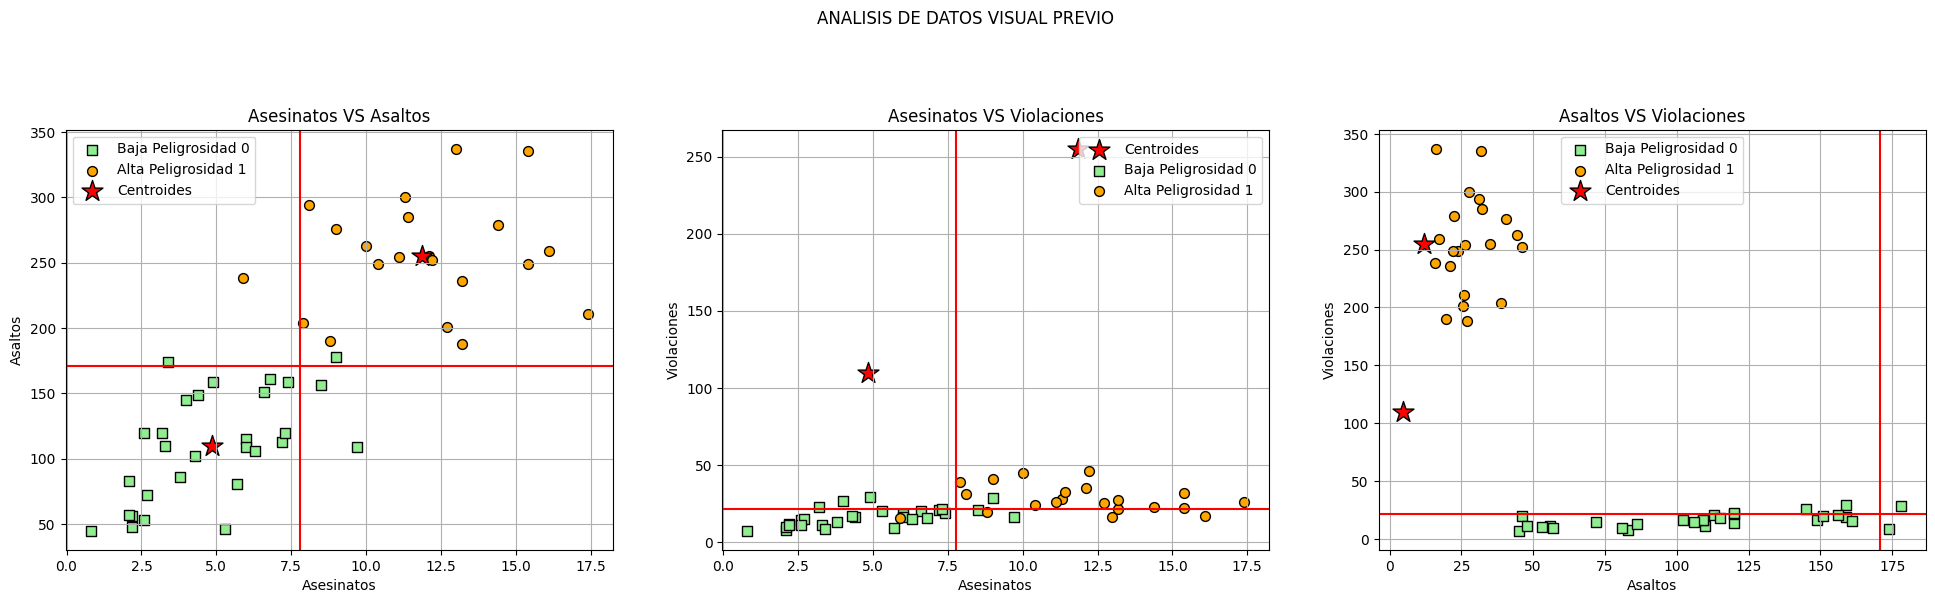

In [20]:
# GRAFICAMOS LOS PUNTOS DEL DATA SET DE CADA UNO.
plt.figure(figsize=(24,12))

# 1er SUBPLOT - ASESINATOS VS ASALTOS  CON K = 2
plt.subplot(231)
plt.scatter(X[y_km==0,0],X[y_km==0,1], s=50, c = "lightgreen", marker= "s",edgecolor="black", label = "Baja Peligrosidad 0")
plt.scatter(X[y_km==1,0],X[y_km==1,1], s=50, c = "orange", marker= "o",edgecolor="black", label = "Alta Peligrosidad 1" )
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker="*", c = "red", edgecolor="black", label = "Centroides")
plt.axvline(x=7.78800, ymin=0, ymax=1, c = "red")
plt.axhline(y=170.760000, xmin=0, xmax=1, c = "red")
plt.title("Asesinatos VS Asaltos")
plt.xlabel("Asesinatos")
plt.ylabel("Asaltos")
plt.grid()
plt.legend()

# 2er SUBPLOT - ASESINATOS VS VIOLACIONES CON K = 2
plt.subplot(232)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker="*", c = "red", edgecolor="black", label = "Centroides")
plt.scatter(X[y_km==0,0],X[y_km==0,2], s=50, c = "lightgreen", marker= "s",edgecolor="black", label = "Baja Peligrosidad 0")
plt.scatter(X[y_km==1,0],X[y_km==1,2], s=50, c = "orange", marker= "o",edgecolor="black", label = "Alta Peligrosidad 1" )
plt.axvline(x=7.78800, ymin=0, ymax=1, c = "red")
plt.axhline(y=21.232000, xmin=0, xmax=1, c = "red")
plt.title("Asesinatos VS Violaciones")
plt.xlabel("Asesinatos")
plt.ylabel("Violaciones")
plt.grid()
plt.legend()

# 3er SUBPLOT - ASALTOS VS VIOLACIONES CON K = 2
plt.subplot(233)
plt.scatter(X[y_km==0,1],X[y_km==0,2], s=50, c = "lightgreen", marker= "s",edgecolor="black", label = "Baja Peligrosidad 0")
plt.scatter(X[y_km==1,2],X[y_km==1,1], s=50, c = "orange", marker= "o",edgecolor="black", label = "Alta Peligrosidad 1" )
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker="*", c = "red", edgecolor="black", label = "Centroides")
plt.axvline(x=170.760000, ymin=0, ymax=1, c = "red")
plt.axhline(y=21.232000, xmin=0, xmax=1, c = "red")
plt.title("Asaltos VS Violaciones")
plt.xlabel("Asaltos")
plt.ylabel("Violaciones")
plt.suptitle("ANALISIS DE DATOS VISUAL PREVIO")
plt.grid()
plt.legend()
plt.show()

In [ ]:
#df_crimenes_kmean

In [21]:
# GRUPO 0: BAJA PELIGROSIDAD
# GRUPO 1: ALTA PELIGROSIDAD
contador = 0
columna = []
for dato in df_crimenes_kmean:
  punto_control = np.array([dato])
  estado = df_crimenes_sinNormalizar.Estado[contador]
  # Obtener a qué grupo pertenece el nuevo punto
  grupo_predicho = km.predict(punto_control)
  if grupo_predicho[0] == 0:
    columna.append("BAJA_PELIGROSIDAD")
  if grupo_predicho[0] == 1:
    columna.append("ALTA_PELIGROSIDAD")
  contador +=1



In [22]:
# DataSet sin normalizar:
df_crimenes_sinNormalizar = pd.read_csv(data_set_ruta)
df_crimenes_sinNormalizar
df_crimenes_sinNormalizar['Peligrosidad'] = columna
df_crimenes_sinNormalizar

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Peligrosidad
0,Alabama,13.2,236,58,21.2,ALTA_PELIGROSIDAD
1,Alaska,10.0,263,48,44.5,ALTA_PELIGROSIDAD
2,Arizona,8.1,294,80,31.0,ALTA_PELIGROSIDAD
3,Arkansas,8.8,190,50,19.5,ALTA_PELIGROSIDAD
4,California,9.0,276,91,40.6,ALTA_PELIGROSIDAD
5,Colorado,7.9,204,78,38.7,ALTA_PELIGROSIDAD
6,Connecticut,3.3,110,77,11.1,BAJA_PELIGROSIDAD
7,Delaware,5.9,238,72,15.8,ALTA_PELIGROSIDAD
8,Florida,15.4,335,80,31.9,ALTA_PELIGROSIDAD
9,Georgia,17.4,211,60,25.8,ALTA_PELIGROSIDAD
